# Regressão Linear

* A regressão linear buscar traçar uma reta que represente todos os pontos contidos em um conjunto amostral.
* O método clássico usado em regressão linear é o método dos mínimos quadrados, ele busca obter a curva que resulte na menor soma das distâncias quadradas de todos os pontos até a reta






## Importações dos pacotes necessários

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar os dados sobre casas para um DataFrame
dados = pd.read_csv("casas.csv")

## Exibição do DataFrame

In [3]:
# ver o formato do DataFrame
print("Formato do DataFrame: ", dados.shape)

# visualizar os 5 primeiros dados
dados.head()

Formato do DataFrame:  (1460, 4)


,tamanho,ano,garagem,preco
0,159.0,2003,2,208500
1,117.0,1976,2,181500
2,166.0,2001,2,223500
3,160.0,1915,3,140000
4,204.0,2000,3,250000


## Dicionário de Variáveis
Esse arquivo csv possui 10 colunas. Sendo elas:
* Tamanho: medido em metros quadrados
* Ano: ano que a casa foi construída
* Garagem: quantidade de garagem
* Preço: preco da casa

## Informações do DataFrame

In [4]:
# exibir as informações
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tamanho  1460 non-null   float64
 1   ano      1460 non-null   int64  
 2   garagem  1460 non-null   int64  
 3   preco    1460 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 45.8 KB


In [5]:
dados.columns

Index(['tamanho', 'ano', 'garagem', 'preco'], dtype='object')

## Descrição

In [6]:
# visualizar a descrição
dados.describe()

,tamanho,ano,garagem,preco
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,140.795205,1971.267808,1.767123,180921.195890
std,48.822992,30.202904,0.747315,79442.502883
min,31.000000,1872.000000,0.000000,34900.000000
25%,105.000000,1954.000000,1.000000,129975.000000
50%,136.000000,1973.000000,2.000000,163000.000000
75%,165.000000,2000.000000,2.000000,214000.000000
max,524.000000,2010.000000,4.000000,755000.000000


## Verificando se há valores nulos

In [7]:
# verificar se há valores nulos (inexistentes) nos dados
dados.isnull().sum()

tamanho    0
ano        0
garagem    0
preco      0
dtype: int64

<AxesSubplot:>

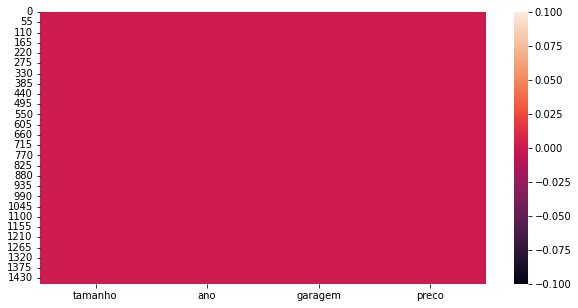

In [8]:
plt.figure(figsize=(10, 5))
sns.heatmap(dados.isnull())

## Correlação

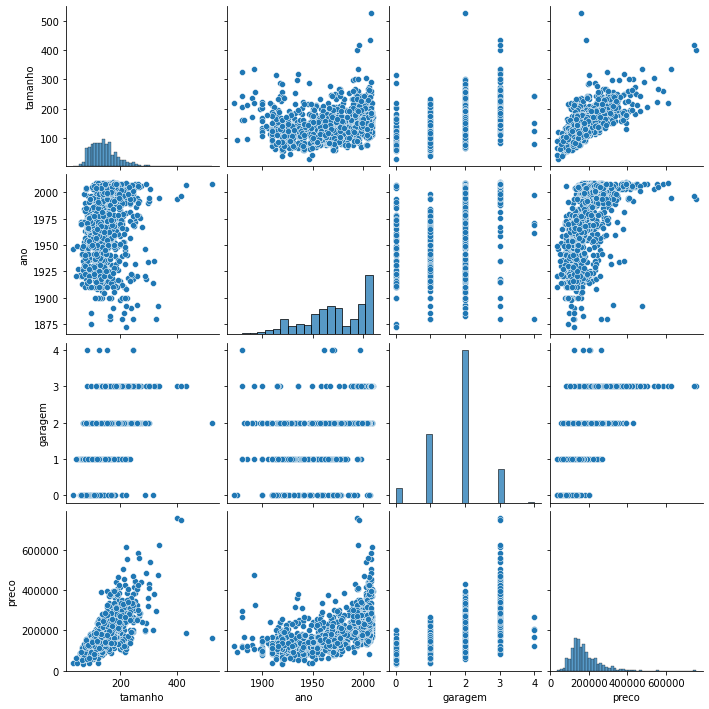

In [9]:
sns.pairplot(dados)

<AxesSubplot:>

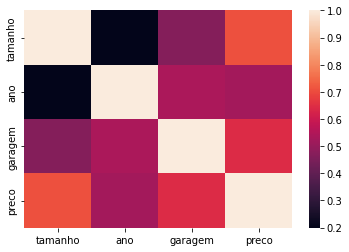

In [10]:
sns.heatmap(dados.corr())

# Modelagem

Dividindo os dados de amostra em treinamento e teste

In [11]:
## importação da biblioteca sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [12]:
# definindo o x e o y
X = dados[['tamanho', 'ano', 'garagem']]
y = dados['preco']

In [13]:
# dividindo em treinamento(70%) e teste(30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
# instanciando a regressão linear
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [15]:
LR.predict([[159.0, 2003, 2]])

C:\Users\Kaique Nakao\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([229260.09892811])

## Testando o modelo

In [17]:
predict = LR.predict(X_test)

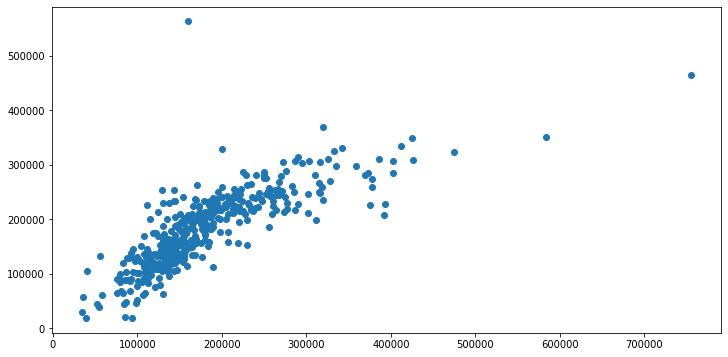

In [19]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predict)

# eixo x temos o valor correto da casa
# eixo y tem o valor o modelo predizeu 

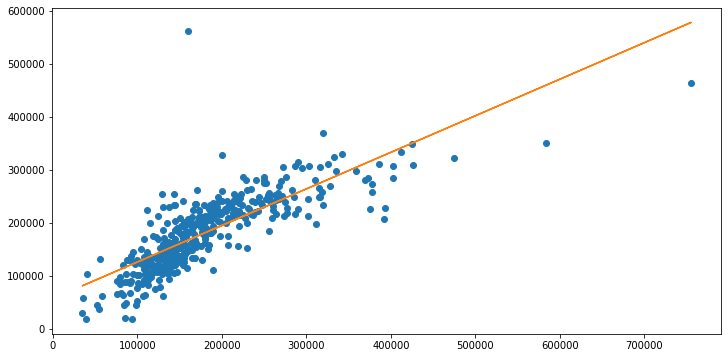

In [22]:
plt.figure(figsize=(12, 6))

m, b = np.polyfit(y_test, predict, 1)
plt.plot(y_test, predict, 'o')
plt.plot(y_test, m*y_test + b)

C:\Users\Kaique Nakao\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


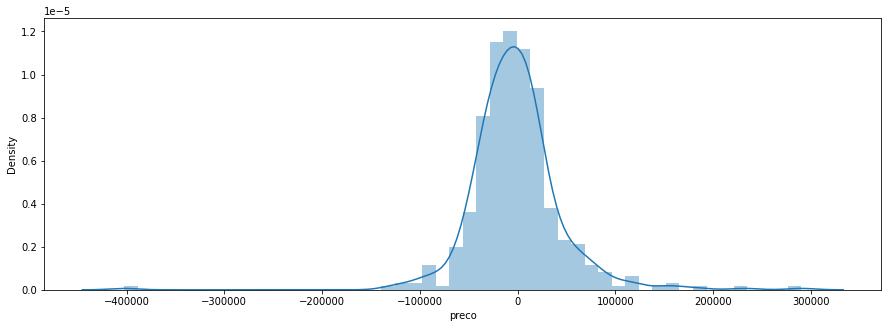

In [33]:
# verificar a acuracia se foi uma boa escolha, calcular o gráfico de distribuição dos erros
plt.figure(figsize=(15, 5))
sns.distplot((y_test-predict));

## Métricas de avaliação

In [25]:
print('MAE ', metrics.mean_absolute_error(y_test, predict))
print('MSE ', metrics.mean_squared_error(y_test, predict))
print('RMSE ', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE  31182.966231241622
MSE  2303170908.1868787
RMSE  47991.36284985954


## Acurácia

In [28]:
accuracy = LR.score(X_test, y_test)
print('The accuracy is: ' + str(accuracy *100) + '%');

The accuracy is: 63.40009323565994%


## Predizendo

In [30]:
LR.predict([[200.0, 2005, 2]])

C:\Users\Kaique Nakao\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([267875.92400198])